In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = "https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/Housing.csv"
hf = pd.read_csv(url)

variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

# **Pre-processing and Training**


> **Separating desired Features and Outputs**


In [ ]:
y = hf.pop('price')
features = hf.columns.tolist()
x = hf.values

t_un = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
t_u = torch.tensor(x, dtype=torch.float32)
t_c = torch.tensor(y, dtype=torch.float32)


> **Splitting Training and Validation Set**


In [ ]:
samples = t_un.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]



> **Linear Regression Training**




In [ ]:
def lin_model(t_u, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss}, \tValidation Loss: {valid_loss}')
  return params, train_losses, valid_losses

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 1000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 1500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 2000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 2500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 3000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 3500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 4000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 4500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0
Epochs: 5000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217132494848.0


> *Trained with LR of* ***1e-2***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 1129847717888.0, 	Validation Loss: 1216956465152.0
Epochs: 1000, 	Training Loss: 1129845882880.0, 	Validation Loss: 1217133674496.0
Epochs: 1500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 2000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 2500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 3000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 3500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 4000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 4500, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0
Epochs: 5000, 	Training Loss: 1129845751808.0, 	Validation Loss: 1217135509504.0


> *Trained with LR of* ***1e-3***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)


print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 4257857667072.0, 	Validation Loss: 5083641151488.0
Epochs: 1000, 	Training Loss: 1561130434560.0, 	Validation Loss: 1871684173824.0
Epochs: 1500, 	Training Loss: 1191426523136.0, 	Validation Loss: 1349938970624.0
Epochs: 2000, 	Training Loss: 1139164971008.0, 	Validation Loss: 1248755187712.0
Epochs: 2500, 	Training Loss: 1131407212544.0, 	Validation Loss: 1225187917824.0
Epochs: 3000, 	Training Loss: 1130150887424.0, 	Validation Loss: 1218970779648.0
Epochs: 3500, 	Training Loss: 1129917317120.0, 	Validation Loss: 1217305378816.0
Epochs: 4000, 	Training Loss: 1129865412608.0, 	Validation Loss: 1216927891456.0
Epochs: 4500, 	Training Loss: 1129851912192.0, 	Validation Loss: 1216904691712.0
Epochs: 5000, 	Training Loss: 1129847848960.0, 	Validation Loss: 1216961708032.0


> *Trained with LR of* ***1e-4***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)


print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 20769711063040.0, 	Validation Loss: 23832974852096.0
Epochs: 1000, 	Training Loss: 17026394357760.0, 	Validation Loss: 19578547601408.0
Epochs: 1500, 	Training Loss: 14032520085504.0, 	Validation Loss: 16183296262144.0
Epochs: 2000, 	Training Loss: 11625615589376.0, 	Validation Loss: 13457302749184.0
Epochs: 2500, 	Training Loss: 9682585387008.0, 	Validation Loss: 11257427001344.0
Epochs: 3000, 	Training Loss: 8108874137600.0, 	Validation Loss: 9474434662400.0
Epochs: 3500, 	Training Loss: 6830991343616.0, 	Validation Loss: 8024005017600.0
Epochs: 4000, 	Training Loss: 5791205556224.0, 	Validation Loss: 6840379244544.0
Epochs: 4500, 	Training Loss: 4943799386112.0, 	Validation Loss: 5871841574912.0
Epochs: 5000, 	Training Loss: 4252299689984.0, 	Validation Loss: 5077397929984.0


# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 22904397889536.0, 	Validation Loss: 26394612465664.0
Epochs: 1000, 	Training Loss: 20598151446528.0, 	Validation Loss: 23872179011584.0
Epochs: 1500, 	Training Loss: 18484845084672.0, 	Validation Loss: 21551449636864.0
Epochs: 2000, 	Training Loss: 16548885430272.0, 	Validation Loss: 19415955406848.0
Epochs: 2500, 	Training Loss: 14777621413888.0, 	Validation Loss: 17452365774848.0
Epochs: 3000, 	Training Loss: 13160862973952.0, 	Validation Loss: 15649955905536.0
Epochs: 3500, 	Training Loss: 11690398711808.0, 	Validation Loss: 14000124329984.0
Epochs: 4000, 	Training Loss: 10359512498176.0, 	Validation Loss: 12495918989312.0
Epochs: 4500, 	Training Loss: 9162589208576.0, 	Validation Loss: 11131586347008.0
Epochs: 5000, 	Training Loss: 8094707351552.0, 	Validation Loss: 9902178172928.0


> *Trained with LR of* ***1e-2***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 25156024008704.0, 	Validation Loss: 28848760553472.0
Epochs: 1000, 	Training Loss: 24896541294592.0, 	Validation Loss: 28566326607872.0
Epochs: 1500, 	Training Loss: 24639130566656.0, 	Validation Loss: 28286050631680.0
Epochs: 2000, 	Training Loss: 24383684870144.0, 	Validation Loss: 28007815184384.0
Epochs: 2500, 	Training Loss: 24130088861696.0, 	Validation Loss: 27731504922624.0
Epochs: 3000, 	Training Loss: 23878277529600.0, 	Validation Loss: 27457038057472.0
Epochs: 3500, 	Training Loss: 23628181667840.0, 	Validation Loss: 27184349577216.0
Epochs: 4000, 	Training Loss: 23379753041920.0, 	Validation Loss: 26913376567296.0
Epochs: 4500, 	Training Loss: 23132947611648.0, 	Validation Loss: 26644081278976.0
Epochs: 5000, 	Training Loss: 22887736016896.0, 	Validation Loss: 26376419672064.0


> *Trained with LR of* ***1e-3***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 25390961655808.0, 	Validation Loss: 29104403382272.0
Epochs: 1000, 	Training Loss: 25364717895680.0, 	Validation Loss: 29075846463488.0
Epochs: 1500, 	Training Loss: 25338493009920.0, 	Validation Loss: 29047312613376.0
Epochs: 2000, 	Training Loss: 25312286998528.0, 	Validation Loss: 29018799734784.0
Epochs: 2500, 	Training Loss: 25286097764352.0, 	Validation Loss: 28990305730560.0
Epochs: 3000, 	Training Loss: 25259931598848.0, 	Validation Loss: 28961830600704.0
Epochs: 3500, 	Training Loss: 25233780113408.0, 	Validation Loss: 28933376442368.0
Epochs: 4000, 	Training Loss: 25207643308032.0, 	Validation Loss: 28904936964096.0
Epochs: 4500, 	Training Loss: 25181523279872.0, 	Validation Loss: 28876512165888.0
Epochs: 5000, 	Training Loss: 25155420028928.0, 	Validation Loss: 28848104144896.0


> *Trained with LR of* ***1e-4***

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 25414558810112.0, 	Validation Loss: 29130066231296.0
Epochs: 1000, 	Training Loss: 25411933175808.0, 	Validation Loss: 29127207813120.0
Epochs: 1500, 	Training Loss: 25409299152896.0, 	Validation Loss: 29124351492096.0
Epochs: 2000, 	Training Loss: 25406671421440.0, 	Validation Loss: 29121490976768.0
Epochs: 2500, 	Training Loss: 25404043689984.0, 	Validation Loss: 29118630461440.0
Epochs: 3000, 	Training Loss: 25401415958528.0, 	Validation Loss: 29115772043264.0
Epochs: 3500, 	Training Loss: 25398788227072.0, 	Validation Loss: 29112913625088.0
Epochs: 4000, 	Training Loss: 25396160495616.0, 	Validation Loss: 29110059401216.0
Epochs: 4500, 	Training Loss: 25393536958464.0, 	Validation Loss: 29107200983040.0
Epochs: 5000, 	Training Loss: 25390909227008.0, 	Validation Loss: 29104338370560.0


# **Linear Regression Loss Plots**


>**SGD Optimized Linear Model**


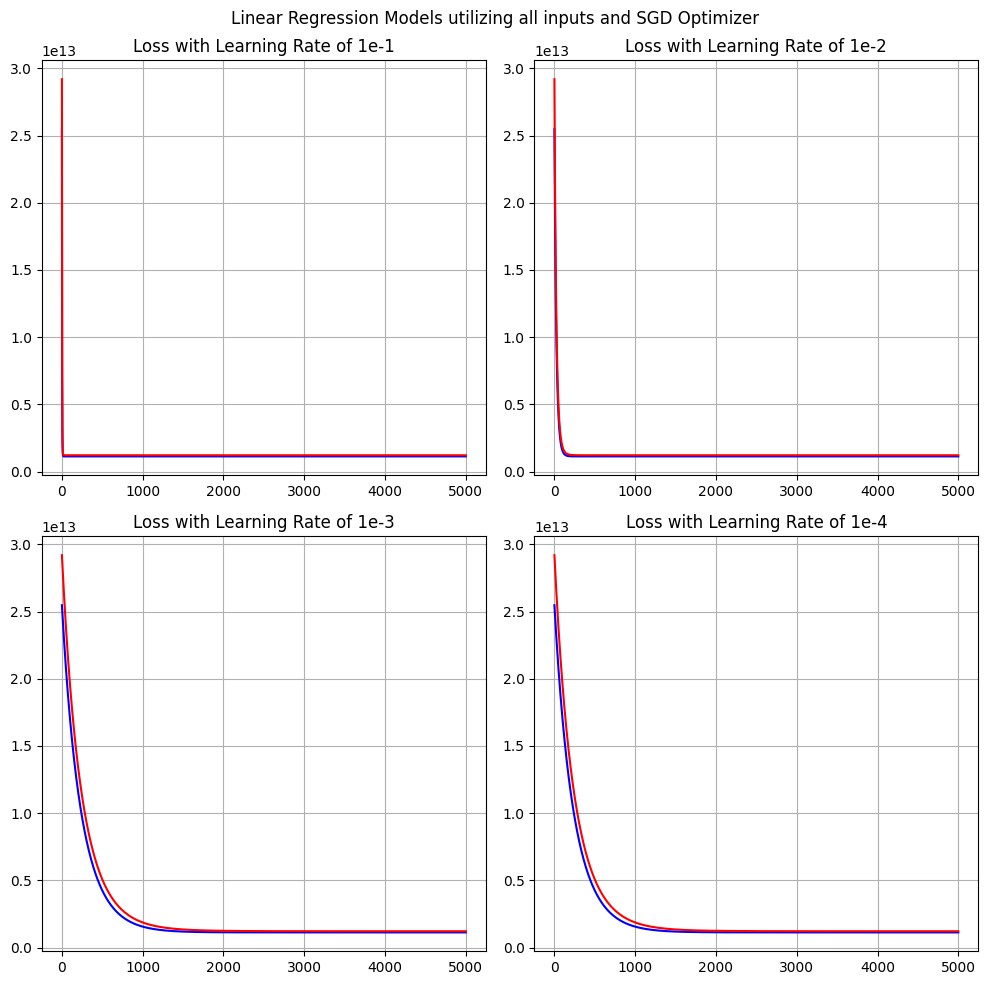

In [16]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression Models utilizing all inputs and SGD Optimizer')

plt.subplot(2,2,1)
plt.grid(True)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.grid(True)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.grid(True)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.grid(True)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()